# GA - Wafer-to-order allocation problem
<br>
Wafer-to-order allocation problem

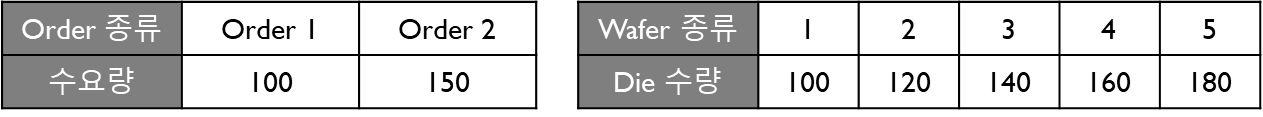

<수요를 충족하는 해>

- Order 1  $ \leftarrow $ Wafer 1
- Order 2 $ \leftarrow $ Wafer 2 + Wafer 3
- Holding: Wafer 4, Wafer 5

<br><br>
<수요를 충족하는 못하는 해>

- Order 1  $ \leftarrow $ Wafer 1
- Order 2 $ \leftarrow $ Wafer 2
- Holding: Wafer 3, Wafer 4, Wafer 5

Wafer-to-order allocation 문제는 수요량을 충족해야 하는 문제인 만큼<br>
GA의 염색체가 실행가능(feasible) 여부 이슈가 존재합니다.<br>

Wafer-to-order allocation 문제를 위한 GA 코드를 작성하기 위해서<br>
(1) 염색체 생성<br>
(2) 생성된 염색체 실행가능 여부 확인<br>
(3-1) 생성된 염색체가 실행가능한 경우 염색체로 사용<br>
(3-2) 생성된 염색체가 실행불가능한 경우<br>
  실행가능한 염색체가 도출될 때까지 (1) – (3) 반복

### 염색체 표현 방법

#### - Object-based representation

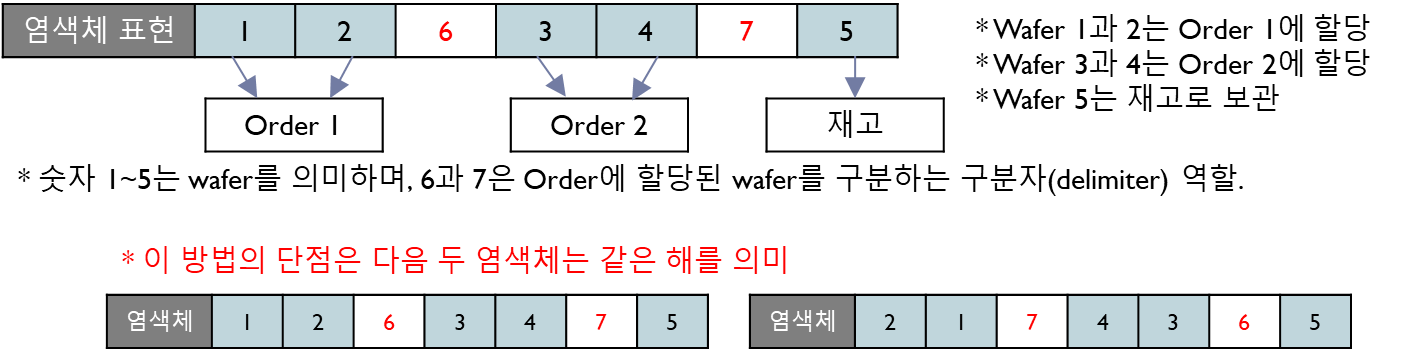

<br>

#### - Group-based representation

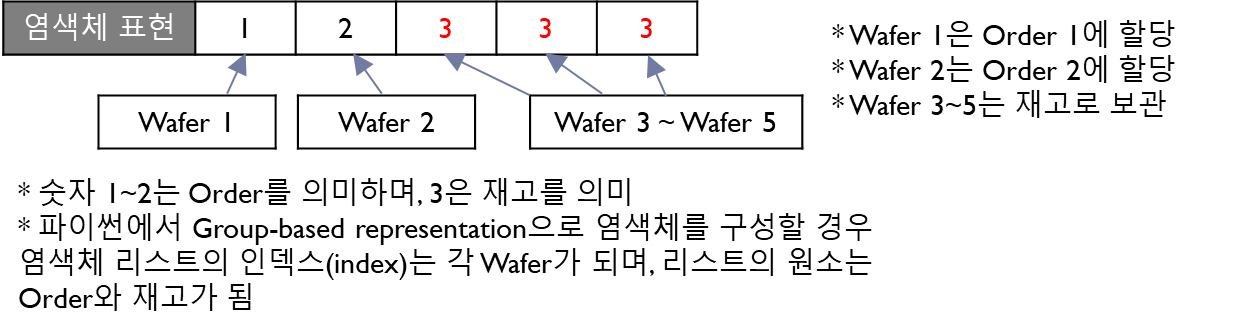

## 1. 염색체 생성 사용자정의함수
<br>
염색체 생성과 염색체 실행가능 여부를 판단하는 코드를 작성하기 위해<br>
간단한 문제를 가지고 필요한 사용자정의함수를 정의하는 과정을 먼저 진행하겠습니다.<br>

Wafer-to-order allocation problem에 대해 GA 코드를 작성할 때,<br>
Group-based representation 방식으로 염색체를 표현하겠습니다.<br>

초기 설정

- 라이브러리 선언
- 데이터 정의 선언
    - Chromosome size
    - Order data (S)
    - Wafer data (L)
- GA 파라미터 설정
    - Population size
    - Crossover rate
    - Mutation rate
    - Mutation selection rate
    - Iteration

In [ ]:
'''---------- 1.1 라이브러리 선언 ----------'''
import numpy as np
import time

# Order data
S = [100, 150]
# Wafer data
L = [100, 120, 140, 160, 180]
'''---------- GA 초기 설정 ----------'''
num_order = len(S) + 1
num_chrom = len(L)
population_size = int(5)
mutation_rate = float(0.1)
mutation_selection_rate = float(0.5)
num_mutation_chrom = round(num_chrom * mutation_selection_rate)
num_iteration = int(1000)

# 사용자 정의 함수
'''---------- Parents selection 함수 정의 - Roulette wheel selection ----------'''
def Roulettewheelselection():
    p_roulette = []
    z_inverse = [1/i for i in z]
    for i in range(len(z_inverse)):
        p_roulette.append(z_inverse[i] / sum(z_inverse))
    select_parent = np.random.choice(population_size, 2, p = p_roulette, replace = False)
    parent_1 = population_list[select_parent[0]]
    parent_2 = population_list[select_parent[1]]
    return parent_1, parent_2

'''---------- 단일점 교차(one-point crossover) ----------'''
def onepointcrossover(parent_1, parent_2, point):
    cross_point = point
    child_1 = ['na' for i in range(num_chrom)]
    child_2 = ['na' for i in range(num_chrom)]
    for i in range(cross_point):
        child_1[i] = parent_2[i]
        child_2[i] = parent_1[i]
    c1 = parent_1[cross_point:]
    c2 = parent_2[cross_point:]
    for i in range(num_chrom - cross_point):
        child_1[child_1.index('na')] = c1[i]
        child_2[child_2.index('na')] = c2[i]
    offspring_list = [child_1, child_2]
    return offspring_list

'''---------- 돌연변이(mutation) ----------'''
def mutation(offspring_list):
    for m in range(len(offspring_list)):
        mutation_prob = np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg = list(np.random.choice(num_chrom, num_mutation_chrom, replace = False))
            m_last = offspring_list[m][m_chg[0]]
            for i in range(num_mutation_chrom - 1):
                offspring_list[m][m_chg[i]] = offspring_list[m][m_chg[i+1]]
            offspring_list[m][m_chg[num_mutation_chrom - 1]] = m_last
    return offspring_list

'''---------- Parents replacement 함수 정의 - 가장 적합도 낮은 염색체 2개 추출 ----------'''
def inferior_parent(arr, r_num): 
    unique_nums = set(arr)
    sorted_nums = sorted(unique_nums, reverse = True)
    z_filter = sorted_nums[:r_num]
    inf = []
    lst = [j for j, i in enumerate(z) if i == z_filter[0]]
    if len(lst) >= 2:  # 가장 안 좋은 적합도 값에 대한 염색체가 2개 이상인 경우
        inf.append(list(np.random.choice(lst, 2, replace = False)))
    else:  # 가장 안 좋은 적합도 값에 대한 염색체가 1개만 있는 경우
        inf.append(lst)
        lst2 = [j for j, i in enumerate(z) if i == z_filter[1]]
        inf.append(list(np.random.choice(lst2, 1, replace = False)))
    inf = sum(inf, [])
    return inf

#### - Group-based representation

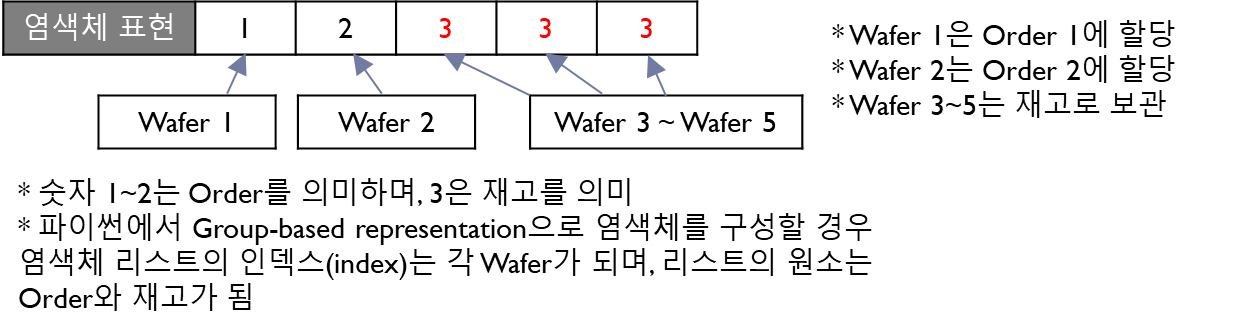

In [ ]:
#(실습) 1 염색체 생성 함수 정의 (사용자정의함수)
'''---------- 염색체(chromosome) 생성 정의 ----------'''
def mkchrom():
    chrom = list(np.random.choice(num_order, num_chrom,
                                  replace = True))
    return chrom
chrom = mkchrom()
print('염색체; ', chrom)

Hint) <span style='background-color:yellow'>np.random.choice(), 복원추출</span>

In [ ]:
chrom = list(np.random.choice(num_order, num_chrom, replace = True))
chrom

## 2. 염색체 디코드화(decoding) 사용자정의함수

디코드(decode)는 염색체로 표현된 해를 우리가 알아볼 수 있도록 표현한 것을 말합니다.<br>

생성된 염색체가 [0, 1, 2, 0, 2]라고 하면, <br>
Order 1은 0번, 3번 Wafer가 할당되고,<br>
Order 2는 1번 Wafer가 할당되고, 재고로는 2번, 4번 Wafer가 할당.<br>
이를 파이썬 리스트로 표현하면 [[0, 3], [1], [2, 4]]로 표현할 수 있음.<br>
<br>
생성된 염색체를 Order별 할당된 Wafer의 목록으로 표현하는 디코드화 사용자정의함수를 작성하겠습니다.

In [ ]:
#(실습) 2 염색체 디코드화(decoding) 함수 정의 (사용자정의함수)
'''---------- 염색체 Order별 할당된 Wafer 목록으로 디코드화 정의 ----------'''
def decode(chrom):
    allot = []
    for i in range(num_order):
        index = [ind for ind, value in enumerate(chrom)
                 if value == i]
        allot.append(index)
    return allot

allot_lst = decode(chrom)
print('주문 할당(decoding): ', allot_lst)

Hint) <span style='background-color:yellow'>"8. 열등한 염색체 두 가지 선택"</span>

가장 안좋은 염색체가 있는 위치를 '열거'하기 위해 리스트 내포를 다음과 사용했음<br>
lst = [j for j, i in enumerate(z) if i == z_filter[0]]

In [ ]:
allot = []  # Order별 할당된 Wafer 목록 리스트
for i in range(num_order):
    index = [ind for ind, value in enumerate(chrom)
             if value == i]
    allot.append(index)
allot

## 3. Order 별 할당된 Wafer의 die 수량 산출 사용자정의함수
<br>
생성된 염색체 실행가능(feasible) 여부 확인을 위해<br>
Order 별 할당된 Wafer의 die의 수량(∑𝐿_𝑗)이 Order의 수요량(𝑆_𝑖)을 충족하는지 확인 필요<br>

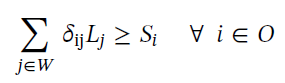

<br>
Order 별 할당된 Wafer의 die 수량(∑𝐿_𝑗)이 수요량(𝑆_𝑖)보다 크면 ∑𝐿_𝑗 이 원소로 반환되고,<br>
그렇지 않다면 빈 리스트(‘’)가 반환되는 사용자정의함수

In [ ]:
#(실습) 3 Order 별 할당된 Wafer의 die 수량 산출 함수 정의 (사용자정의함수)
'''---------- Order 별 할당된 Wafer의 die 수량 정의 - 제약식 ----------'''
def sumL(allot):
    sum_L_lst = []
    for i in range(num_order - 1):
        sum_L = 0
        for j in allot[i]:
            sum_L += L[j]
        if sum_L >= S[i]:
            sum_L_lst.append(sum_L)
        else:
            sum_L_lst.append('')
    return sum_L_lst

sum_L_lst = sumL(allot_lst)
print('Order별 할당된 die 수량: ', sum_L_lst)

Hint) <span style='background-color:yellow'>append() 함수 활용</span>

## 4.1. 염색체의 실행가능여부

In [ ]:
chrom = [1, 1, 0, 2, 0]
allot_lst = decode(chrom)
sum_L_lst = sumL(allot_lst)
print('주문 할당(decoding): ', allot_lst)
print('Order별 할당된 die 수량: ', sum_L_lst)

chrom = [1, 1, 0, 2, 0]은 Order 1, 2 모두 Wafer가 할당 됨<br>
<span style='background-color:yellow'>
    각 Order 별 할당된 die 수량은 수요 충족</span>

In [ ]:
chrom = [0, 1, 2, 0, 2]
allot_lst = decode(chrom)
sum_L_lst = sumL(allot_lst)
print('주문 할당(decoding): ', allot_lst)
print('Order별 할당된 die 수량: ', sum_L_lst)

chrom = [0, 1, 2, 0, 2]은 Order 1, 2 모두 Wafer가 할당 됨<br>
<span style='background-color:pink'>
    Order 2의 할당된 die 수량은 수요 미충족</span>

In [ ]:
chrom = [0, 0, 0, 0, 0]
allot_lst = decode(chrom)
sum_L_lst = sumL(allot_lst)
print('주문 할당(decoding): ', allot_lst)
print('Order별 할당된 die 수량: ', sum_L_lst)

chrom = [0, 0, 0, 0, 0]은 Order 2는 Wafer가 할당 안됨<br>
<span style='background-color:pink'>
    Order 2의 할당된 die 수량은 수요 미충족</span>
<br>
<br>
<span style='background-color:yellow'>
    *리스트 allot_lst[:-1]와 sum_L_lst 모두 ‘빈 리스트’가 없는 경우 실행가능합니다.</span>
<br>
allot_lst[:-1]는 재고를 제외하고 오직 order에만 할당된 wafer들의 목록을 의미합니다.

In [ ]:
allot_lst[:-1]

## 4.2.1. 실행가능한 염색체 생성을 위한 필요구문1
## - '빈' 리스트
<br>
파이썬에서 [[]], [‘’], [0]은 ‘빈 리스트’로 인식합니다.<br>
파이썬에서 리스트가 ‘빈 리스트’인 경우 조건문은 False로 인식합니다.<br><br>
리스트에 ‘빈 리스트’가 존재하는 경우 파이썬에서 False로 인식하는 특성을 활용해서<br>
GA에서 염색체의 Feasibility 여부를 판단할 수 있습니다.<br><br>
리스트의 원소가 모두 ‘빈 리스트’인지, 하나라도 ‘빈 리스트’가 포함되어 있는지는<br>
all() 함수와 any() 함수를 통해 판단할 수 있습니다.

- all()함수: 모든 원소가 존재하는 경우 True, 그렇지 않다면 False
- any()함수: 원소가 하나라도 존재하는 경우 True, 그렇지 않다면 False
- not all()함수: all()함수의 반대 논리
- not any()함수: any()함수의 반대 논리

In [ ]:
A = ['', '', '']
B = ['', '', 1]
print('all(A): ', all(A))
print('all(B): ', all(B))

In [ ]:
print('any(A): ', any(A))
print('any(B): ', any(B))

In [ ]:
print('not all(A): ', not all(A))
print('not all(B): ', not all(B))

In [ ]:
print('not any(A): ', not any(A))
print('not any(B): ', not any(B))

In [ ]:
print('all(A) and all(B): ', (all(A)) & (all(B)))
print('all(A) and not all(B): ', (all(A)) & (not all(B)))
print('not all(A) and not all(B): ', not (all(A)) & (all(B)))

In [ ]:
C = [[], [], []]
D = [[], [], [1]]
print('all(C): ', all(C))
print('any(C): ', any(C))
print('all(D): ', all(D))
print('any(D): ', any(D))

In [ ]:
E = [0, 0, 0]
F = [0, 0, 1]
print('all(E): ', all(E))
print('any(E): ', any(E))
print('all(F): ', all(F))
print('any(F): ', any(F))

## 4.2.2. 실행가능한 염색체 생성을 위한 필요구문2
## - While문으로 '빈' 리스트가 없는 리스트 생성
<br>
e.g.) 숫자 0과 1이 발생할 확률이 0.3, 0.7을 가지는 시행<br>
연속된 5번의 독립시행에서 모두 1이 발생할 때 까지 반복<br>

- Pr(x=0) = 0.3
- Pr(x=1) = 0.7

In [ ]:
x = []
for i in range(5):
    rand = np.random.choice(2, 1, p = [0.3, 0.7], replace = False)[0]
    x.append(rand)
x

In [ ]:
print('x:', x, ', 조건:', not all(x))

In [ ]:
#(실습) While문으로 '빈' 리스트가 없는 리스트 생성
x = []
for i in range(5):
    rand = np.random.choice(2, 1, p = [0.3, 0.7], replace = False)[0]
    x.append(rand)
print('x:', x, ', 조건:', not all(x))
while not all(x):
    x = []
    for i in range(5):
        rand = np.random.choice(2, 1, p = [0.3, 0.7], replace = False)[0]
        x.append(rand)
    print('x:', x, ', 조건:', not all(x))

Hint) <span style='background-color:yellow'>"12. While 문" 활용</span>

- while 문: while문은 조건문이 참(true)인 동안 while문 안에 있는 코드가 반복해서 수행됩니다.

## 4.2.3. 실행가능한 염색체 생성을 위한 While 문
<br>
리스트 allot_lst와 sum_L_lst 모두 ‘빈 리스트’가 없는 경우
<br> 실행가능한 염색체들이 생성되도록 While 문을 작성하겠습니다.

In [ ]:
chrom = mkchrom()  # 단일 염색체
allot_lst = decode(chrom)  # Order별 할당된 Wafer 목록 리스트
sum_L_lst = sumL(allot_lst)  # Order 별 할당된 Wafer의 die 수량을 나타내는 리스트
print('chrom: ', chrom)
print('allot_lst: ', allot_lst)
print('sum_L_lst: ', sum_L_lst)

In [ ]:
#(실습)
print('염색체: ', chrom, 'Infeasible: ',
      not (all(allot_lst[:-1])) & (all(sum_L_lst)))

Hint) <span style='background-color:yellow'>
    *리스트 allot_lst[:-1]와 sum_L_lst 모두 ‘빈 리스트’가 없는 경우 실행가능합니다.</span>
<br>
allot_lst[:-1]는 재고를 제외하고 오직 order에만 할당된 wafer들의 목록을 의미합니다.

In [ ]:
#(실습) 4.2 실행가능한 염색체 생성을 위한 While 문
'''---------- 실행가능한 염색체 생성을 위한 While 문 ----------'''
chrom = mkchrom()
allot_lst = decode(chrom)
sum_L_lst = sumL(allot_lst)
print('염색체: ', chrom, 'Infeasible: ',
      not (all(allot_lst[:-1])) & (all(sum_L_lst)))
while not (all(allot_lst[:-1])) & (all(sum_L_lst)): # Feasible 확인
    chrom = mkchrom()
    allot_lst = decode(chrom)
    sum_L_lst = sumL(allot_lst)
    print('염색체: ', chrom, 'Infeasible: ',
          not (all(allot_lst[:-1])) & (all(sum_L_lst)))
print('실행가능 염색체: ', chrom)

## 4.3. 실행가능한 염색체 초기 집단 생성
<br>
실행가능한 염색체들로 구성된 초기 염색체 집단을 생성하겠습니다.

In [ ]:
#(실습) 4.3 실행가능한 염색체 초기 집단 생성
'''---------- 초기 집단(population) 생성 ----------'''
population_list = []
for i in range(population_size):
    chrom = mkchrom()
    allot_lst = decode(chrom)
    sum_L_lst = sumL(allot_lst)
    while not (all(allot_lst[:-1])) & (all(sum_L_lst)): # Feasible 확인
        chrom = mkchrom()
        allot_lst = decode(chrom)
        sum_L_lst = sumL(allot_lst)
    population_list.append(chrom)
print('초기집단: ',population_list)

## 5. 적합도 (fitness) 계산 사용자정의함수 정의
<br>
파이썬 코드로 초기 집단(population)들에 대한 적합도를 계산하는<br>
사용자정의 함수를 작성하고, 사용자정의함수를 사용하여 염색체 집단의 적합도 계산하겠습니다.

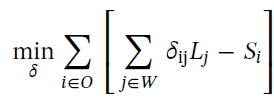

In [ ]:
#(실습) 5 적합도 함수 정의 (사용자정의함수)
'''---------- 적합도(fitness) 함수 정의 ----------'''
def fitness(chrom):
    allot = decode(chrom)
    fit = []
    for i in range(num_order - 1):
        sum_L = 0
        for j in allot[i]:
            sum_L += L[j]
        fit.append(sum_L- S[i])
    return sum(fit)

'''---------- 적합도(fitness) 계산 ----------'''
z = []
for i in range(len(population_list)):
    z.append(fitness(population_list[i]))

print('초기집단 적합도: ', z)

## 6. 가장 좋은 해(염색체) 기록 & 부모 염색체 선택
<br>
초기 집단(population)들에 대해 적합도 기준으로 가장 좋은 염색체와 적합도 기록하고,<br>
Roulette wheel selection 방식으로 두 가지의 부모 염색체 선택하겠습니다.

In [ ]:
#(실습) 6 가장 좋은 해(염색체) 기록 & 부모 염색체 선택
'''---------- 가장 좋은 해 기록 ----------'''
best_list = population_list[z.index(min(z))]
best_obj = min(z)
print('best 염색체: ', best_list)
print('best 적합도: ', best_obj)

'''-------- Parents selection --------'''
parent_1, parent_2 = Roulettewheelselection()
print('부모 염색체1: ', parent_1)
print('부모 염색체2: ', parent_2)

## 7. 실행가능한 자손염색체 생성
<br>
실행가능한 초기 염색체 생성과 마찬가지로 자손염색체 생성을 위해<br>
부모염색체의 교차 및 돌연변이를 거친 염색체가 실행가능한지 이슈가 존재합니다.<br>

실행가능한 자손염색체 생성을 위해 염색체 생성과 마찬가지로 While문이 활용되며,<br>
편의성을 위해 사전에 작성한 단일점 교차와 돌연변이 사용자정의함수를 사용하겠습니다.

- 단일점 교차 함수: onepointcrossover(parent_1, parent_2, point)
- 돌연변이 함수: mutation(offspring_list)

In [ ]:
#(실습) 7 실행가능한 자손염색체 생성을 위한 While 문
'''-------- 단일점 교차(one-point crossover) & 돌연변이(mutation) --------''' 
offspring_list = onepointcrossover(parent_1, parent_2, 2)
offspring_list = mutation(offspring_list)
allot_lst = []; sum_L_lst = []
for i in range(len(offspring_list)):
    allot_i = decode(offspring_list[i])
    sum_L_i = sumL(allot_i)
    allot_lst.extend(allot_i[:-1])
    sum_L_lst.extend(sum_L_i)
print('자손염색체: ', offspring_list, 'Infeasible: ',
      not (all(allot_lst)) & (all(sum_L_lst)))
while not (all(allot_lst)) & (all(sum_L_lst)): # Feasible 확인
    parent_1, parent_2 = Roulettewheelselection()
    offspring_list = onepointcrossover(parent_1, parent_2, 2)
    offspring_list = mutation(offspring_list)
    allot_lst = []; sum_L_lst = []
    for i in range(len(offspring_list)):
        allot_i = decode(offspring_list[i])
        sum_L_i = sumL(allot_i)
        allot_lst.extend(allot_i[:-1])
        sum_L_lst.extend(sum_L_i)
    print('자손염색체: ', offspring_list, 'Infeasible: ',
          not (all(allot_lst)) & (all(sum_L_lst)))
print('실행가능 자손염색체: ', offspring_list)

## 8. GA 코드 iteration 반복
<br>
사전에 지정한 iteration 반복 횟수(num_interation)만큼 실행하는 코드를 작성하겠습니다.

In [ ]:
#(실습) 8. GA 코드 iteration 반복 (GA main code)
'''---------- GA main code ----------'''
start_time = time.time()
'''---------- 3.1 초기 집단(population) 생성 ----------'''
population_list = []
for i in range(population_size):
    chrom = mkchrom()
    allot_lst = decode(chrom)
    sum_L_lst = sumL(allot_lst)
    while not (all(allot_lst[:-1])) & (all(sum_L_lst)):
        chrom = mkchrom()
        allot_lst = decode(chrom)
        sum_L_lst = sumL(allot_lst)
    population_list.append(chrom)
for n in range(num_iteration):
    '''---------- 3.2 적합도(fitness) 계산 ----------'''
    z = []
    for i in range(len(population_list)):
        z.append(fitness(population_list[i])) 
    '''---------- 3.3 가장 좋은 해 기록 ----------'''
    best_list = population_list[z.index(min(z))]
    best_obj = min(z)
    if n % 100 == 0:
        print('[Iter ' + str(n + 1) + '] best_list: ', best_list)
        print('[Iter ' + str(n + 1) + '] best_obj: ', best_obj)
    '''-------- 3.4 Parents selection --------'''
    parent_1, parent_2 = Roulettewheelselection()
    '''-------- 3.5 단일점 교차(one-point crossover) & 3.6 돌연변이(mutation) --------''' 
    offspring_list = onepointcrossover(parent_1, parent_2, 2)
    offspring_list = mutation(offspring_list)
    allot_lst = []; sum_L_lst = []
    for i in range(len(offspring_list)):
        allot_i = decode(offspring_list[i])
        sum_L_i = sumL(allot_i)
        allot_lst.extend(allot_i[:-1])
        sum_L_lst.extend(sum_L_i)
    while not (all(allot_lst)) & (all(sum_L_lst)): # Feasible 확인
        parent_1, parent_2 = Roulettewheelselection()
        offspring_list = onepointcrossover(parent_1, parent_2, 2)
        offspring_list = mutation(offspring_list)
        allot_lst = []; sum_L_lst = []
        for i in range(len(offspring_list)):
            allot_i = decode(offspring_list[i])
            sum_L_i = sumL(allot_i)
            allot_lst.extend(allot_i[:-1])
            sum_L_lst.extend(sum_L_i)
    '''-------- 3.7 Parents replacement --------'''
    inf = inferior_parent(z, 2)
    for i in range(len(inf)):
        population_list[inf[i]] = offspring_list[i]

## 9. 결과도출
<br>
GA의 iteration이 완료된 이후 최종 결과를 도출하겠습니다.

In [ ]:
'''-------- 결과 도출 --------'''
allot_best = decode(best_list)
print('최적 유전자: ', best_list)
print('최적 Wafer 할당: ', allot_best[:-1])
print('목적함수 최적값: ', best_obj)
print('연산 시간: %s'% (time.time() - start_time))